# Topic modeling with Scikit Testing

- Brian Kalinowski 11/3/2019

In [1]:
import pandas as pd
import numpy as np
from collections import *
from typing import *
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import pyLDAvis.sklearn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
news_content = pd.read_csv('/Users/briankalinowski/Desktop/Data/news_content_final.csv')
news_content.head()

,title,text,type,tokenized_headline,tokenized_content,valid_score
0,Muslims BUSTED They Stole Millions In Govt Ben...,Print They should pay all the back all the mon...,bias,muslims,somalis,0
1,Re Why Did Attorney General Loretta Lynch Plea...,Why Did Attorney General Loretta Lynch Plead T...,bias,loretta lynch,loretta lynch barracuda brigade iran loretta l...,0
2,BREAKING Weiner Cooperating With FBI On Hillar...,Red State Fox News Sunday reported this mornin...,bias,weiner fbi hillary email investigation,red state fox news anthony weiner fbi hillary ...,0
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias,donald j. trump,kayla mueller isis carl mueller donald trump,0
4,FANTASTIC! TRUMPS 7 POINT PLAN To Reform Healt...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,notokes,house senate obamacare obamacare democrats oba...,0


In [3]:
vectorizer = CountVectorizer(min_df=10, stop_words=['notokes'])
content_vectorized = vectorizer.fit_transform(news_content.tokenized_content)

In [4]:
lda = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', verbose=True, random_state=2)
fake_news_topics = lda.fit_transform(content_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [5]:
pyLDAvis.enable_notebook()
lda_doc_word_clusters = pyLDAvis.sklearn.prepare(lda, content_vectorized, vectorizer, sort_topics=True, mds='tsne')
lda_doc_word_clusters

/Users/anaconda3/envs/FakeNewsChallenge/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5      130.992310 -208.192902       1        1  27.153018
0      204.812149  236.394119       2        1  15.403029
6     -266.386292  205.799164       3        1  14.161264
1     -105.978188   94.686981       4        1  11.272697
4     -129.479797 -245.767914       5        1   9.456868
2      260.487823  -21.060863       6        1   8.621700
3       86.137192   78.869705       7        1   5.242730
9     -261.161591  -49.567326       8        1   4.012931
8      -25.446444  290.782501       9        1   2.616490
7      -23.273335  -79.460503      10        1   2.059273, topic_info=      Category          Freq   Term         Total  loglift  logprob
25187  Default  1.174691e+06    the  1.174691e+06  30.0000  30.0000
17903  Default  5.270200e+05     of  5.270200e+05  29.0000  29.0000
12869  Default  3.955330e+05     in  3.955330e+05  28.0000  28.0000
25871  Default  7.310700e+04  trump  7.310700e+04  27.0000  27.0000
1883   Default  4.962250e+05    and  4.962250e+05  26.0000  26.0000
...        ...           ...    ...           ...      ...      ...
19326  Topic10  1.132018e+03  plant  2.003148e+03   3.3121  -5.8011
4251   Topic10  2.641573e+03     by  9.995556e+04   0.2495  -4.9538
2515   Topic10  2.384872e+03     at  8.966743e+04   0.2559  -5.0560
3072   Topic10  2.145994e+03     be  6.888301e+05  -1.8886  -5.1615
18012  Topic10  1.532173e+03     on  1.682923e+05  -0.8162  -5.4985

[901 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
1          1  0.001715         000
1          2  0.015434         000
1          3  0.281056         000
1          4  0.012004         000
1          5  0.108397         000
...      ...       ...         ...
28047      7  0.978594       yemen
28051      8  0.995984         yen
28110      8  0.994663        yuan
28155      9  0.999378        zika
28184      3  0.996881  zuckerberg

[2416 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 7, 2, 5, 3, 4, 10, 9, 8])

In [7]:
content_clusters_full = pd.DataFrame(content_vectorized.toarray(), columns=vectorizer.get_feature_names())

In [20]:
# topic_clusters = pd.Series([fake_news_topics[n].argmax() for n in range(fake_news_topics.shape[0])])
# fake_news_content['topic_id'] = news_topics
# fake_news_content.head()

In [12]:
# news_clusters = pd.DataFrame(fake_news_content.groupby(['topic_id', 'type']).type.count())
# pd.options.display.max_rows = 100
# news_clusters

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=2)

content_clusters_tsne = pd.DataFrame(tsne.fit_transform(content_clusters_full), columns=['X', 'Y'])
content_clusters_tsne['topic_id'] = pd.Series([fake_news_topics[n].argmax() for n in range(fake_news_topics.shape[0])])
content_clusters_tsne['type'] = LabelEncoder().fit_transform(fake_news_content.type)
content_clusters_tsne.head()

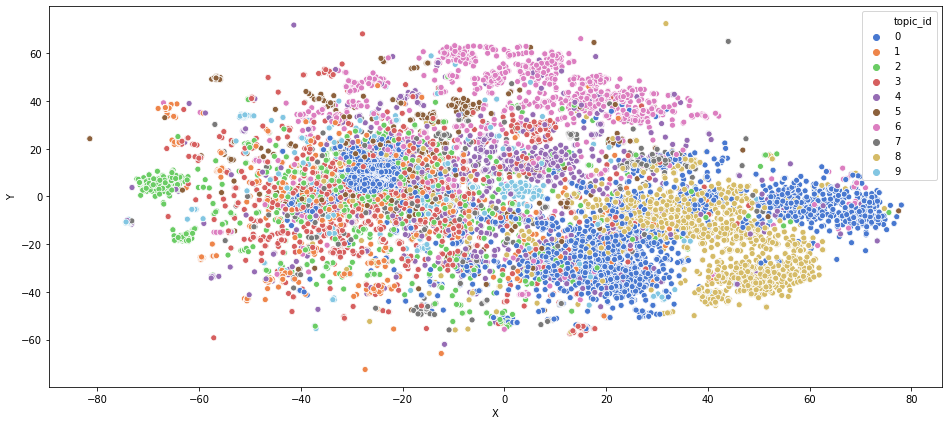

In [53]:
plt.figure(figsize=(16,7))
sns.scatterplot(x=content_clusters_tsne.X, 
                y=content_clusters_tsne.Y, 
                hue=content_clusters_tsne.topic_id, 
                palette=sns.color_palette("muted", 10))

In [68]:
tfidf_vectorizer = TfidfVectorizer(min_df=10, stop_words=['notokes'])
tfidf_content_vectorized = tfidf_vectorizer.fit_transform(fake_news_content.tokenized_content)

In [91]:
nmf = NMF(n_components=10, init='random', max_iter=100, random_state=2)

nmf_content = nmf.fit_transform(tfidf_content_vectorized)


In [92]:
pd.DataFrame(tfidf_content_vectorized.toarray(), columns=tfidf_vectorizer.get_feature_names())

,11,1st,2016,2nd,7th,aap,aaron,aba,abadi,abbas,...,zimbabwe,zimmerman,zion,zionism,zionist,zionists,zone,zucker,zuckerberg,zuesse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=2)

nmf_content_clusters = pd.DataFrame(tsne.fit_transform(nmf_content.toarray()), columns=['X', 'Y'])
content_clusters_tsne['topic_id'] = pd.Series([fake_news_topics[n].argmax() for n in range(fake_news_topics.shape[0])])
content_clusters_tsne['type'] = LabelEncoder().fit_transform(fake_news_content.type)
content_clusters_svd.head()